# Lighthouse - Desafio ciência de dados 

In [1]:
# Importação das bibliotecas necessárias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

In [2]:
# Carregando os dados:
base = pd.read_csv('teste_indicium_precificacao.csv')

## 1. Limpeza e Pré-Processamento de dados
Vou iniciar a análise verificando os dados disponibilizados no dataset. Dessa forma, farei a limpeza necessária para começar a análise dos dados mais relevantes.

In [3]:
# Informações gerais do dataset:
def visao_geral(base):
    print(base.info())
    print("\nValores ausentes por coluna:\n", base.isnull().sum())
    print("\nResumo estatístico:\n", base.describe())

visao_geral(base)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [4]:
# Preenchendo os valores nulos relevantes: (Assumirei que valores nulos em "reviews_por_mes" são 0)
base['reviews_por_mes'] = base['reviews_por_mes'].fillna(0)

In [5]:
# Removendo linhas com nome nulo:
base = base[base['nome'].notna()]

In [6]:
# Convertendo a coluna `ultima_review` para datetime para análise temporal
base['ultima_review'] = pd.to_datetime(base['ultima_review'], errors='coerce')

In [7]:
# Verificando outliers no preço (considerar preços muito altos ou zerados como anômalos)
base = base[(base['price'] > 0) & (base['price'] < 1000)]

In [8]:
# verificar duplicatas:
base.duplicated().sum()

0

In [9]:
# Visualização após limpeza
print("\nDados limpos:")
visao_geral(base)


Dados limpos:
<class 'pandas.core.frame.DataFrame'>
Index: 48569 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             48569 non-null  int64         
 1   nome                           48569 non-null  object        
 2   host_id                        48569 non-null  int64         
 3   host_name                      48548 non-null  object        
 4   bairro_group                   48569 non-null  object        
 5   bairro                         48569 non-null  object        
 6   latitude                       48569 non-null  float64       
 7   longitude                      48569 non-null  float64       
 8   room_type                      48569 non-null  object        
 9   price                          48569 non-null  int64         
 10  minimo_noites                  48569 non-null  int64         
 11  numer

## 2. Análise Eploratória de Dados:
Aqui, começarei a análisar a relação entre as variáveis e como elas interferem no preço do alguel. Para isso, vou utilizar gráficos relacionando as variáveis do dataset para entender a ligação entre cada uma delas.

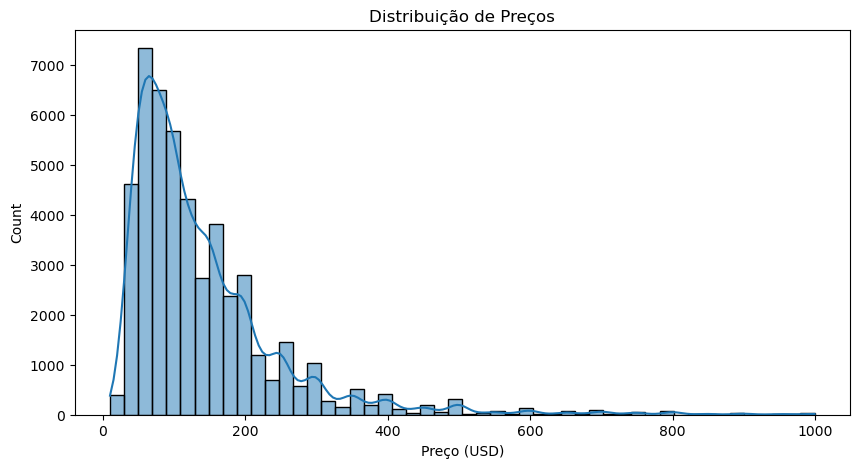

In [10]:
# Distribuição de preços:
plt.figure(figsize=(10, 5))
sns.histplot(base['price'], bins=50, kde=True)
plt.title('Distribuição de Preços')
plt.xlabel('Preço (USD)')
plt.show()

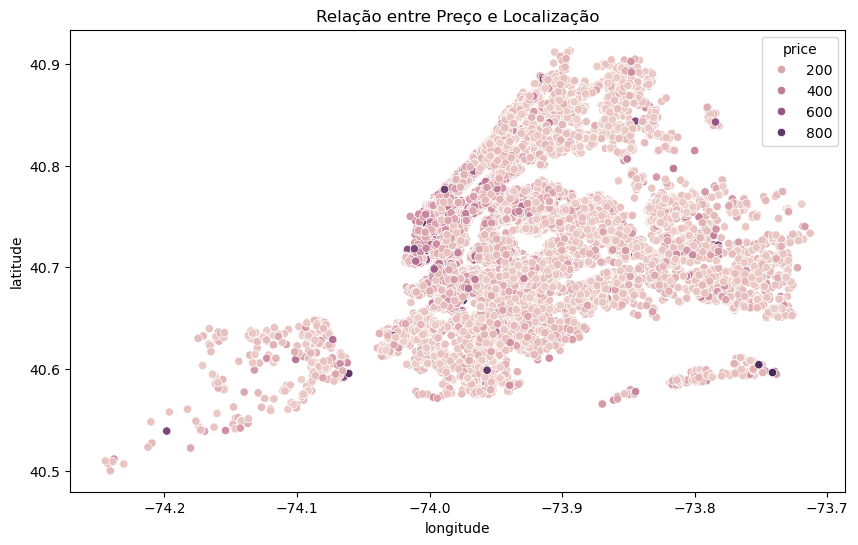

In [11]:
# Relação entre preço e latitude/longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='price', data=base)
plt.title('Relação entre Preço e Localização')
plt.show()

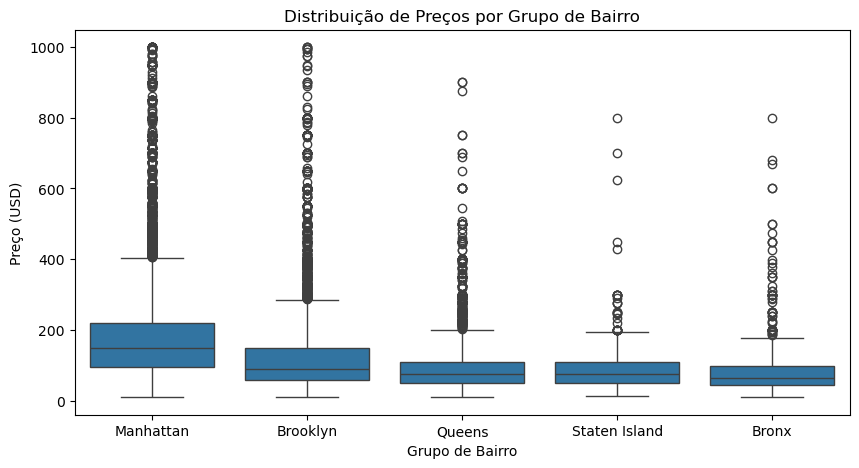

In [12]:
# Boxplot por bairro_group:
plt.figure(figsize=(10, 5))
sns.boxplot(x='bairro_group', y='price', data=base)
plt.title('Distribuição de Preços por Grupo de Bairro')
plt.xlabel('Grupo de Bairro')
plt.ylabel('Preço (USD)')
plt.show()

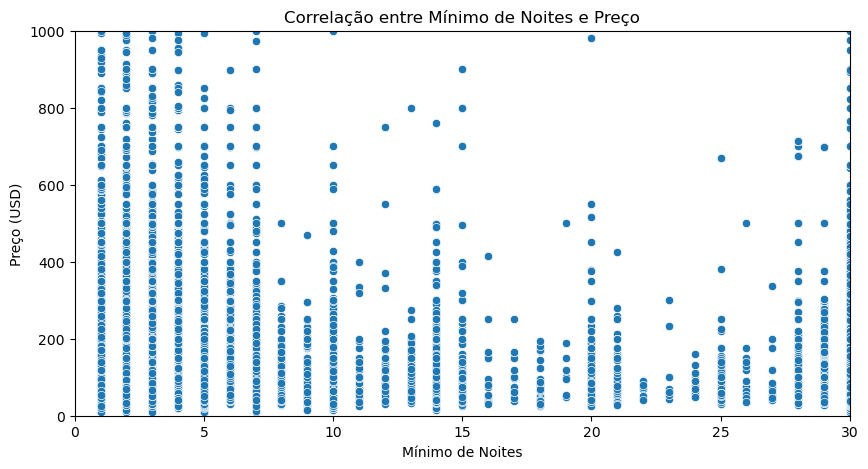

In [13]:
# Correlação entre preço, mínimo de noites e disponibilidade:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='minimo_noites', y='price', data=base)
plt.title('Correlação entre Mínimo de Noites e Preço')
plt.xlabel('Mínimo de Noites')
plt.ylabel('Preço (USD)')
plt.xlim(0, 30)
plt.ylim(0, 1000)
plt.show()

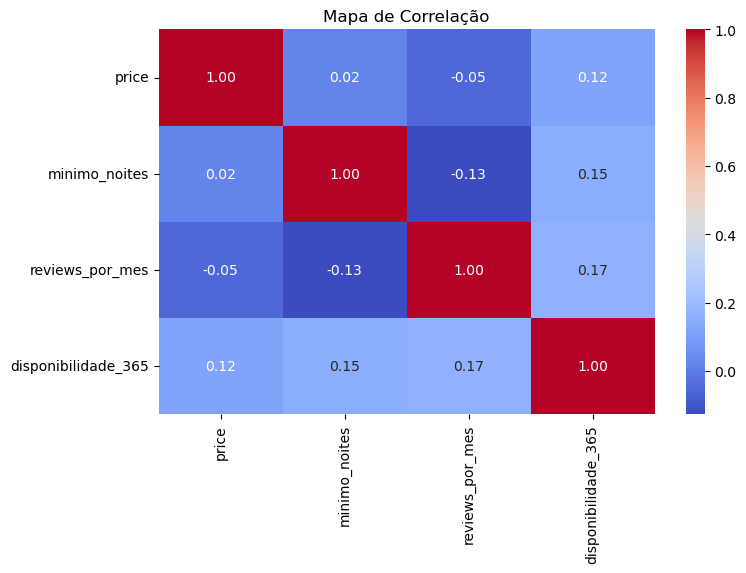

In [14]:
# Correlação geral (heatmap)
correlation = base[['price', 'minimo_noites', 'reviews_por_mes', 'disponibilidade_365']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlação')
plt.show()

No gráfico acima, podemos avaliar que o mínimo de noites possui baixa relação com o preço do alguel, mas a disponibilidade ao longo do ano tem uma pequena influência nesse valor. 

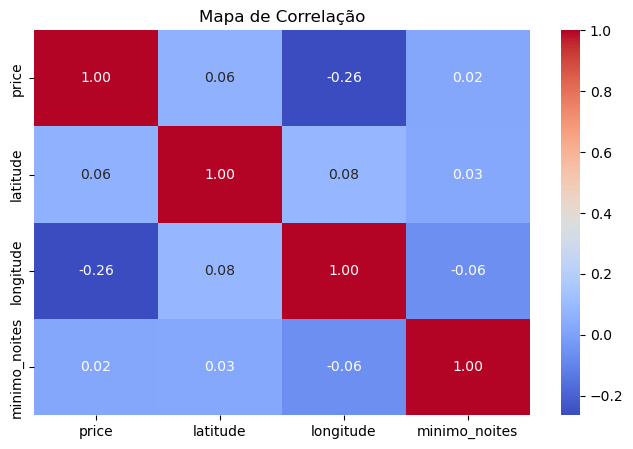

In [15]:
# Correlação geral (heatmap)
correlation = base[['price', 'latitude', 'longitude', 'minimo_noites']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlação')
plt.show()

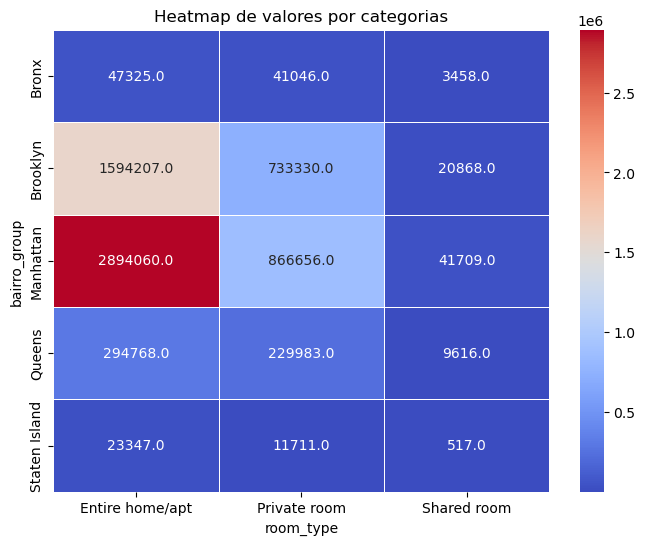

In [16]:
# Correlação geral (heatmap)
pivot_table = base.pivot_table(values='price', index='bairro_group', columns='room_type', aggfunc='sum')

# Plotar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Heatmap de valores por categorias')
plt.show()

Aqui, podemos notar que o tipo de quarto possui uma ligação direta com o preço do aluguel. Casa ou apartamento completo tem um valor muito mais alto do que um quarto privado e ambos possuem valor mais elevado do que um quarto compartilhado. Além disso, podemos notar que o local onde os preços são mais elevados são Manhattan, Brooklyn e Bronx, respectivamente.

# 3. Resposta às Perguntas de Negócio:
### 3.1 - Onde seria mais indicada a compra de um apartamento para alugar?

In [17]:
# Analisando a relação de bairro_group X price:
bairro_group_price = base.groupby('bairro_group')['price'].mean().sort_values(ascending=False)
print(bairro_group_price)

bairro_group
Manhattan        177.368458
Brooklyn         117.297088
Staten Island     96.148649
Queens            94.528038
Bronx             84.479301
Name: price, dtype: float64


In [18]:
# Analisando a relação de bairro_group X numero_de_reviews:
bairro_group_numero = base.groupby('bairro_group')['numero_de_reviews'].mean().sort_values(ascending=False)
print(bairro_group_numero)

bairro_group
Staten Island    31.191892
Queens           27.761189
Bronx            26.049678
Brooklyn         24.266620
Manhattan        21.126318
Name: numero_de_reviews, dtype: float64


### Podemos obervar duas possibilidades de compra que dependem do objetivo final:
1. Manhattan -> é a melhor opção para maximizar o preço do aluguel, porque possui o maior preço médio diário;
2. Staten Island -> por ter o maior número de reviews (o que indica maior volume de reservas), é uma ótima opção para maximizar a demanda e garantir alta taxa de ocupação.

### 3.2 - O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

In [19]:
corr_minimo_noites = base['minimo_noites'].corr(base['price'])
corr_disponibilidade = base['disponibilidade_365'].corr(base['price'])
print(f"Correlação entre mínimo de noites e preço: {corr_minimo_noites}")
print(f"Correlação entre disponibilidade e preço: {corr_disponibilidade}")

Correlação entre mínimo de noites e preço: 0.01885745010397959
Correlação entre disponibilidade e preço: 0.11760367506363849


Como o resultado da correlação entre as variáveis foi baixo, podemos desconsiderar que o mínimo de noites e a disponibilidade interfiram no preço do aluguel estipulado para o imóvel

### 3.3 - Existe algum padrão no texto do nome do local para lugares de mais alto valor?
Peço desculpas porque, infelizmente, não consegui criar uma relação entre as colunas nome e price.

## 4. Desenvolvimento do modelo preditivo:

In [20]:
base = base.drop('id', axis=1)
base = base.drop('host_id', axis=1)
base = base.drop('calculado_host_listings_count', axis=1)
base = base.drop('host_name', axis=1)
base = base.drop('ultima_review', axis=1)

In [21]:
# Pré-processamento de dados:
base = pd.get_dummies(base, columns=['room_type', 'bairro_group', 'bairro', 'nome'], drop_first=True)

In [22]:
# Divisão dos dados em treino e teste:
X = base.drop('price', axis=1)
y = base['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Treinamento do modelo (Random Forest):
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [24]:
# Avaliação do modelo:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: R${rmse}")
print(f"MAE: R${mae}")
print(f"R²: {r2}")

RMSE: R$87.3404065671344
MAE: R$46.19971175622813
R²: 0.3882104203356984


In [25]:
# Previsão do preço para o apartamento específico
apartamento = {
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

In [26]:
# Transformar o dicionário em DataFrame
apartamento_df = pd.DataFrame([apartamento])

In [27]:
apartamento_df = apartamento_df.drop('id', axis=1)
apartamento_df = apartamento_df.drop('host_id', axis=1)
apartamento_df = apartamento_df.drop('calculado_host_listings_count', axis=1)
apartamento_df = apartamento_df.drop('host_name', axis=1)
apartamento_df = apartamento_df.drop('ultima_review', axis=1)

In [28]:
# Codificar variáveis categóricas
apartamento_df = pd.get_dummies(apartamento_df, columns=['room_type', 'bairro_group', 'bairro', 'nome'], drop_first=True)

In [29]:
# Garantir que as colunas estejam alinhadas com o modelo treinado
apartamento_df = apartamento_df.reindex(columns=X.columns, fill_value=0)

In [30]:
# Prever o preço
preco_previsto = model.predict(apartamento_df)
print(f"Preço previsto para o apartamento: {preco_previsto[0]}")

Preço previsto para o apartamento: 237.8


In [31]:
# Salvando o modelo:
with open("modelo_precificacao.pkl", "wb") as file:
    pickle.dump(model, file)